In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

import pandas as pd


In [2]:
from tensorflow.keras import datasets , models , layers
import matplotlib.pyplot as plt

In [3]:
import zipfile
import os



In [4]:
zip_file_path = 'archive (2).zip'

In [5]:
# Define the directory to unzip into
unzip_dir = 'archive(2)'  # You can specify your own directory name

# Create the directory if it doesn't exist
os.makedirs(unzip_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f'Unzipped files to: {unzip_dir}')


Unzipped files to: archive(2)


In [6]:
import os
import shutil
import random

def split_dataset(source_dir, train_dir, test_dir, val_dir, train_ratio=0.8, val_ratio=0.1):
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    for category in os.listdir(source_dir):
        category_path = os.path.join(source_dir, category)
        if os.path.isdir(category_path):
            images = os.listdir(category_path)
            random.shuffle(images)

            # Create class directories in train, test, and val folders
            train_class_dir = os.path.join(train_dir, category)
            test_class_dir = os.path.join(test_dir, category)
            val_class_dir = os.path.join(val_dir, category)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)
            os.makedirs(val_class_dir, exist_ok=True)

            train_size = int(len(images) * train_ratio)
            val_size = int(len(images) * val_ratio)

            # Copy images to the respective directories
            for img in images[:train_size]:
                shutil.copy(os.path.join(category_path, img), os.path.join(train_class_dir, img))
            for img in images[train_size:train_size + val_size]:
                shutil.copy(os.path.join(category_path, img), os.path.join(val_class_dir, img))
            for img in images[train_size + val_size:]:
                shutil.copy(os.path.join(category_path, img), os.path.join(test_class_dir, img))

# Define your directory paths
source_directory = 'archive(2)/archive'
train_directory = 'train'
test_directory = 'test'
val_directory = 'val'

split_dataset(source_directory, train_directory, test_directory, val_directory)



In [7]:
import os

train_dir = 'train'

# List all files in the train directory
print(os.listdir(train_dir))

['FreshApple', 'FreshBanana', 'FreshBellpepper', 'FreshCarrot', 'FreshCucumber', 'FreshMango', 'FreshOrange', 'FreshPotato', 'FreshStrawberry', 'FreshTomato', 'RottenApple', 'RottenBanana', 'RottenBellpepper', 'RottenCarrot', 'RottenCucumber', 'RottenMango', 'RottenOrange', 'RottenPotato', 'RottenStrawberry', 'RottenTomato']


In [8]:
img_width = 180
img_height = 180

In [9]:
import os
import cv2
import imghdr

image_exts = ['jpeg', 'png', 'jpg', 'gif', 'bmp'] 

for image_class in os.listdir(train_directory):
    class_dir = os.path.join(train_directory, image_class)
    if os.path.isdir(class_dir):  
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in correct form: {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}: {}'.format(image_path, e))

Image not in correct form: train\FreshBanana\freshBanana (1).jpg
Image not in correct form: train\FreshBanana\freshBanana (418).jpg
Image not in correct form: train\FreshBanana\freshBanana (422).jpg
Image not in correct form: train\FreshCarrot\freshCarrot (1).webp
Image not in correct form: train\FreshCarrot\freshCarrot (415).jpg
Image not in correct form: train\FreshCarrot\freshCarrot (545).jpg
Issue with image train\FreshCucumber\.ipynb_checkpoints: [Errno 13] Permission denied: 'train\\FreshCucumber\\.ipynb_checkpoints'
Image not in correct form: train\FreshCucumber\freshCucumber (1).jpg
Image not in correct form: train\FreshCucumber\freshCucumber (100).jpg
Image not in correct form: train\FreshCucumber\freshCucumber (102).jpg
Image not in correct form: train\FreshCucumber\freshCucumber (103).jpg
Image not in correct form: train\FreshCucumber\freshCucumber (105).jpg
Image not in correct form: train\FreshCucumber\freshCucumber (106).jpg
Image not in correct form: train\FreshCucumber\

In [10]:
data_train = tf.keras.utils.image_dataset_from_directory(
                   train_directory,
                    shuffle = True,
                    image_size= (img_width , img_height),
                    batch_size = 32,
                    validation_split = False)


Found 11522 files belonging to 20 classes.


In [11]:
data_cat=data_train.class_names

In [12]:
len(data_cat)

20

In [13]:
import os
import cv2
import imghdr

image_exts = ['jpeg', 'png', 'jpg', 'gif', 'bmp']  # Supported image extensions

for image_class in os.listdir(test_directory):
    class_dir = os.path.join(test_directory, image_class)
    if os.path.isdir(class_dir):  # Ensure it's a directory
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in correct form: {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}: {}'.format(image_path, e))

Issue with image test\FreshApple\.ipynb_checkpoints: [Errno 13] Permission denied: 'test\\FreshApple\\.ipynb_checkpoints'
Image not in correct form: test\FreshBanana\freshBanana (1).webp
Issue with image test\FreshBellpepper\.ipynb_checkpoints: [Errno 13] Permission denied: 'test\\FreshBellpepper\\.ipynb_checkpoints'
Image not in correct form: test\FreshCucumber\freshCucumber (104).jpg
Image not in correct form: test\FreshCucumber\freshCucumber (110).jpg
Image not in correct form: test\FreshCucumber\freshCucumber (118).jpg
Image not in correct form: test\FreshCucumber\freshCucumber (125).jpg
Image not in correct form: test\FreshCucumber\freshCucumber (126).jpg
Image not in correct form: test\FreshCucumber\freshCucumber (141).jpg
Image not in correct form: test\FreshCucumber\freshCucumber (144).jpg
Image not in correct form: test\FreshCucumber\freshCucumber (149).jpg
Image not in correct form: test\FreshCucumber\freshCucumber (150).jpg
Image not in correct form: test\FreshCucumber\fresh

In [14]:
data_test = tf.keras.utils.image_dataset_from_directory(
                   test_directory,
                    shuffle = False,
                    image_size= (img_width , img_height),
                    batch_size = 32,
                    validation_split = False)

Found 3230 files belonging to 20 classes.


In [15]:
data_test.class_names

['FreshApple',
 'FreshBanana',
 'FreshBellpepper',
 'FreshCarrot',
 'FreshCucumber',
 'FreshMango',
 'FreshOrange',
 'FreshPotato',
 'FreshStrawberry',
 'FreshTomato',
 'RottenApple',
 'RottenBanana',
 'RottenBellpepper',
 'RottenCarrot',
 'RottenCucumber',
 'RottenMango',
 'RottenOrange',
 'RottenPotato',
 'RottenStrawberry',
 'RottenTomato']

In [16]:
import os
import cv2
import imghdr

image_exts = ['jpeg', 'png', 'jpg', 'gif', 'bmp']  # Supported image extensions

for image_class in os.listdir(val_directory):
    class_dir = os.path.join(val_directory, image_class)
    if os.path.isdir(class_dir):  # Ensure it's a directory
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in correct form: {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}: {}'.format(image_path, e))

Image not in correct form: val\FreshCucumber\freshCucumber (101).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (107).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (116).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (121).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (132).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (154).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (207).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (533).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (539).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (543).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (544).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (545).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (546).jpg
Image not in correct form: val\FreshCucumber\freshCucumber (556).jpg
Image not in correct form: val\Fre

In [17]:
data_val = tf.keras.utils.image_dataset_from_directory(
                   val_directory,
                    shuffle = False,
                    image_size= (img_width , img_height),
                    batch_size = 32,
                    validation_split = False)

Found 3217 files belonging to 20 classes.


In [18]:
data_train
data_val
data_test

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [25]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [26]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
361/361 [==============================] - 202s 554ms/step - loss: 1.8579 - accuracy: 0.4538 - val_loss: 1.0489 - val_accuracy: 0.6979
Epoch 2/25
361/361 [==============================] - 192s 531ms/step - loss: 0.9861 - accuracy: 0.7093 - val_loss: 0.7150 - val_accuracy: 0.7889
Epoch 3/25
361/361 [==============================] - 202s 559ms/step - loss: 0.6233 - accuracy: 0.8161 - val_loss: 0.3743 - val_accuracy: 0.8856
Epoch 4/25
361/361 [==============================] - 187s 516ms/step - loss: 0.3995 - accuracy: 0.8790 - val_loss: 0.2637 - val_accuracy: 0.9210
Epoch 5/25
361/361 [==============================] - 186s 513ms/step - loss: 0.2615 - accuracy: 0.9195 - val_loss: 0.2436 - val_accuracy: 0.9235
Epoch 6/25
361/361 [==============================] - 187s 516ms/step - loss: 0.1742 - accuracy: 0.9425 - val_loss: 0.1552 - val_accuracy: 0.9534
Epoch 7/25
361/361 [==============================] - 187s 516ms/step - loss: 0.1433 - accuracy: 0.9563 - val_loss: 0.1417 -

Text(0.5, 1.0, 'Loss')

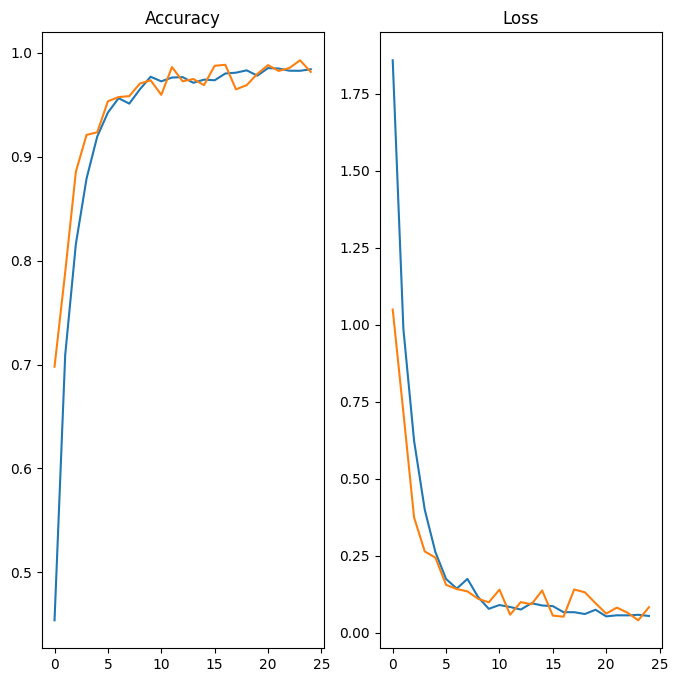

In [27]:
 epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [28]:
image = 'test/RottenMango/rottenMango (117).jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

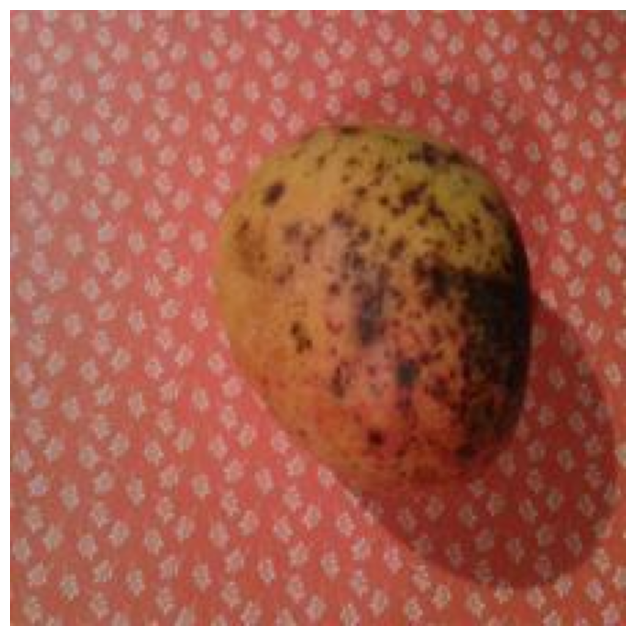

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'test/RottenMango/rottenMango (117).jpg'
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8)) 
plt.imshow(img)
plt.axis('off')  
plt.show()


In [30]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 237ms/step


In [31]:
score = tf.nn.softmax(predict)

In [32]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is RottenMango with accuracy of 99.99


In [33]:
image = 'test/RottenBanana/rottenBanana (113).jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

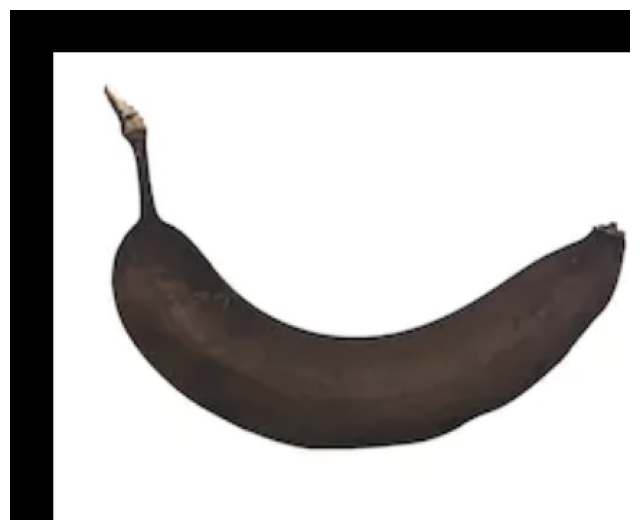

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'test/RottenBanana/rottenBanana (113).jpg'
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8)) 
plt.imshow(img)
plt.axis('off')  
plt.show()

In [35]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 29ms/step


In [36]:
score = tf.nn.softmax(predict)

In [37]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is RottenBanana with accuracy of 100.00


In [38]:
image = 'test/RottenTomato/rottenTomato (11).jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

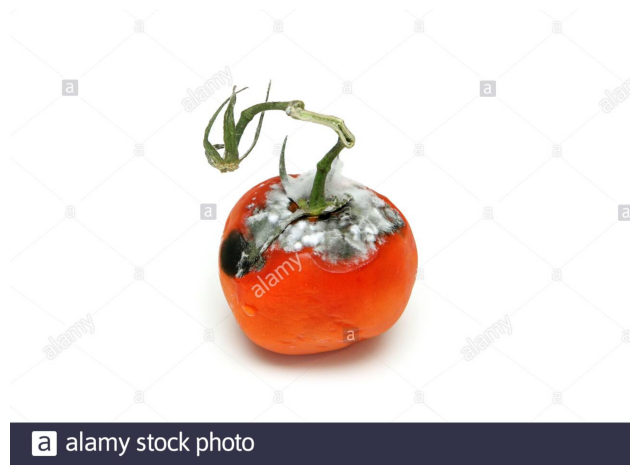

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'test/RottenTomato/rottenTomato (11).jpg'
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8)) 
plt.imshow(img)
plt.axis('off')  
plt.show()

In [40]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 29ms/step


In [41]:
score = tf.nn.softmax(predict)

In [42]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is RottenTomato with accuracy of 100.00


In [43]:
image = 'test/FreshApple/freshApple (147).jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

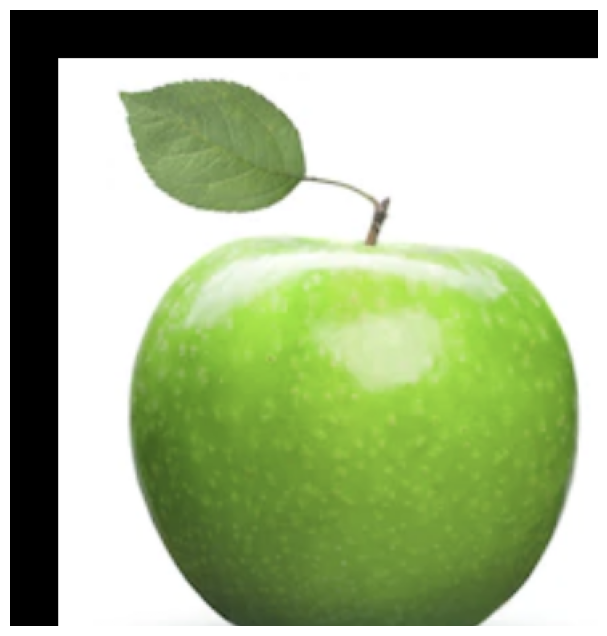

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'test/FreshApple/freshApple (147).jpg'
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8)) 
plt.imshow(img)
plt.axis('off')  
plt.show()

In [45]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 29ms/step


In [46]:
score = tf.nn.softmax(predict)

In [47]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is FreshApple with accuracy of 100.00


In [48]:
image = 'test/FreshPotato/freshPotato (112).jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

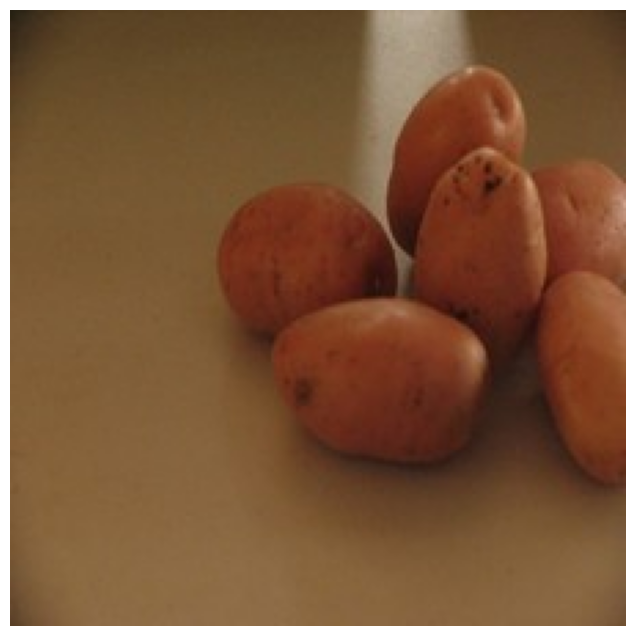

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'test/FreshPotato/freshPotato (112).jpg'
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8)) 
plt.imshow(img)
plt.axis('off')  
plt.show()

In [50]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))


1/1 [==============================] - 0s 31ms/step
Veg/Fruit in image is FreshPotato with accuracy of 100.00


In [51]:
image = 'test/FreshCucumber/freshCucumber (15).jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

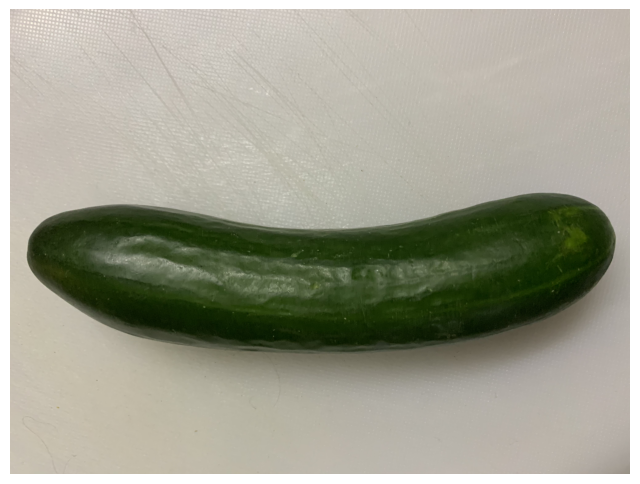

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'test/FreshCucumber/freshCucumber (15).jpg'
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8)) 
plt.imshow(img)
plt.axis('off')  
plt.show()

In [53]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

1/1 [==============================] - 0s 27ms/step
Veg/Fruit in image is FreshCucumber with accuracy of 100.00
